In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from pmdarima.arima import auto_arima, ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
dataset = pd.read_csv('monthly_csv.csv')

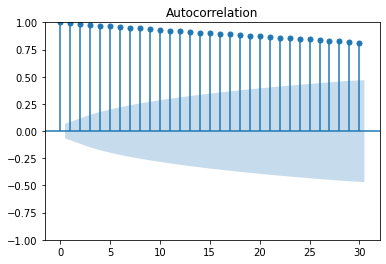

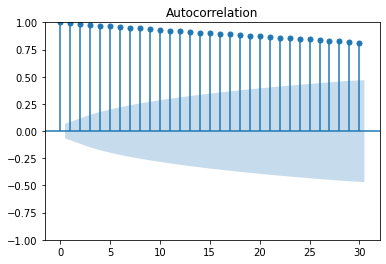

In [3]:
# Draw Autocorrelation
plot_acf(dataset['Price'])

In [7]:
# Since the p-value is larger than 0.05 (say alpha = 0.05), we need to do the differencing
def adf_test(series):
    res = adfuller(series)
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    return res

In [8]:
# Checking the original data without differencing
test_result = adf_test(dataset['Price'])

ADF Statistic: 0.814324
p-value: 0.991864


In [9]:
# 1st difference
diff_1 = dataset['Price'].diff(periods=1)
diff_1 = diff_1.iloc[1:]

In [13]:
test_result = adf_test(diff_1)

ADF Statistic: -6.217087
p-value: 0.000000


In [15]:
model = auto_arima(dataset['Price'], d=1, D=1)

In [16]:
dataset.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [17]:
to_predict = list(range(847, 1500))
predict = pd.DataFrame(model.predict(n_periods = 653), columns=['Predict Result'], index = to_predict)

In [18]:
predict

,Predict Result
847,1866.819277
848,1874.906677
849,1892.839979
850,1903.298036
851,1917.231617
...,...
1495,3569.488343
1496,3571.842369
1497,3574.196396
1498,3576.550422


In [40]:
draw_x = dataset.iloc[:, 0:1].values
draw_y = dataset.iloc[:, 1].values
draw_x = np.array(draw_x)
for item in draw_x:
    item[0] = (float(item[0][0:4]) * 12) + (float(item[0][5:]))

pred_x = list(range(24248, 24901))

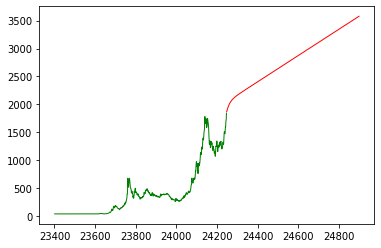

In [43]:
import matplotlib.pyplot as plt 
plt.plot(draw_x, draw_y, lw=1,  color='green')
plt.plot(pred_x, predict, lw=1,  color='red')